In [81]:
#for extracting data, download GetOldTweets package and go to the package's folder
#In command prompt, enter, for tweets before elections
#python Exporter.py --querysearch "donald trump" --since 2016-08-20 --maxtweets 10000 --toptweets
#for tweets after election, enter
#python Exporter.py --querysearch "donald trump" --since 2017-02-16 --maxtweets 10000 --toptweets

In [ ]:
from __future__ import division
import re
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
#Reading saved tweets
df_bef=pd.read_csv('output_bef.csv', sep= ';')

In [12]:
#Checking the data
df_bef.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,KABCRadio,2016-12-29 05:29,0,2,President-elect Donald Trump is claiming anoth...,NaN,NaN,NaN,8.142596e+17,https://twitter.com/KABCRadio/status/814259633...
1,FoxNews,2016-12-29 05:20,129,365,Moore: There's real structural problems with t...,NaN,NaN,NaN,8.142572e+17,https://twitter.com/FoxNews/status/81425716490...
2,DavidRomeiPHD,2016-12-19 04:49,32,30,Why is #DonaldTrump meeting with #Israel 's #M...,NaN,NaN,#DonaldTrump #Israel #Mossad #Netanyahu,8.106257e+17,https://twitter.com/DavidRomeiPHD/status/81062...
3,CNN,2016-12-29 03:31,1660,3162,A mall in China has erected a statue reimagini...,NaN,NaN,NaN,8.142297e+17,https://twitter.com/CNN/status/814229695936000000
4,OOsal,2016-12-29 05:29,0,0,China Erects Massive Statue of Donald Trump as...,NaN,NaN,NaN,8.142596e+17,https://twitter.com/OOsal/status/8142596192163...


In [20]:
#Cleaning tweets
analysis=[]
for i in range(len(df_bef)):
    df_bef['text'][i]=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", df_bef['text'][i]).split())
    analysis.append(TextBlob(df_bef['text'][i]))

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [41]:
print(analysis[1].sentiment)

Sentiment(polarity=0.2, subjectivity=0.30000000000000004)


In [50]:
#getting analysis
analysed=[]
sentiment_score=[]
for i in range(len(df_bef)):
    sentiment_score.append(analysis[i].sentiment.polarity)
    if analysis[i].sentiment.polarity>0:
        analysed.append('positive')
    elif analysis[i].sentiment.polarity==0:
        analysed.append('neutral')
    elif analysis[i].sentiment.polarity<0:
        analysed.append('negetive')

In [30]:
analysed[:10]

['positive',
 'positive',
 'negetive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'negetive']

In [51]:
df_bef_fin=pd.DataFrame(columns=['username','date','tweets','analysis','sentiment_score'])

In [53]:
df_bef_fin['username']=df_bef['username']
df_bef_fin['date']=df_bef['date']
df_bef_fin['tweets']=df_bef['text']
df_bef_fin['analysis']=analysed
df_bef_fin['sentiment_score']=sentiment_score

In [54]:
df_bef_fin.head(10)

,username,date,tweets,analysis,sentiment_score
0,KABCRadio,2016-12-29 05:29,President elect Donald Trump is claiming anoth...,positive,0.400000
1,FoxNews,2016-12-29 05:20,Moore There s real structural problems with th...,positive,0.200000
2,DavidRomeiPHD,2016-12-19 04:49,Why is DonaldTrump meeting with Israel s Mossa...,negetive,-0.400000
3,CNN,2016-12-29 03:31,A mall in China has erected a statue reimagini...,neutral,0.000000
4,OOsal,2016-12-29 05:29,China Erects Massive Statue of Donald Trump as...,neutral,0.000000
5,MotherJones,2016-12-29 05:15,5 ways Donald Trump could ruin your lunch in 2...,neutral,0.000000
6,guardian,2016-12-29 05:28,Donald Trump claims credit for creating 8 000 ...,neutral,0.000000
7,antoniodelotero,2016-12-29 01:33,a few things to leave in 2016 non black people...,positive,0.016667
8,JesseWMSuphan,2016-12-29 04:05,Dear 2016 please don t take Debbie Reynolds We...,positive,0.250000
9,RUKKY_MAN,2016-12-29 05:29,did you know that Donald trump game is worth 130,negetive,-0.050000


In [70]:
pos=0
neg=0
neu=0
for i in range(len(df_bef_fin)):
    if df_bef_fin.analysis[i]=='positive':
        pos=pos+1
    elif df_bef_fin.analysis[i]=='negetive':
        neg=neg+1
    elif df_bef_fin.analysis[i]=='neutral':
        neu=neu+1


In [79]:
print('Positive percentage:',pos/len(df_bef_fin)*100)
print('Negetive percentage:',(neg/len(df_bef_fin))*100)
print('Neutral percentage:',(neu/len(df_bef_fin))*100)

('Positive percentage:', 36.5558912386707)
('Negetive percentage:', 16.290030211480364)
('Neutral percentage:', 47.15407854984895)


In [96]:
posp=pos/len(df_bef_fin)*100
negp=(neg/len(df_bef_fin))*100
neup=(neu/len(df_bef_fin))*100

In [99]:
perc=[pos,neg,neu]
print(perc)

[3025, 1348, 3902]


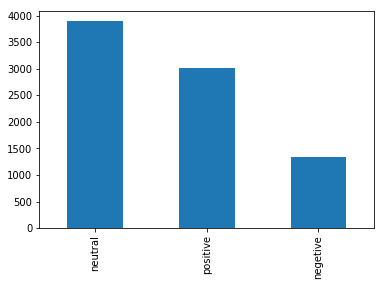

In [112]:
df_bef_fin['analysis'].value_counts().plot(kind='bar')